In [1]:
import pandas as pd
import datetime, warnings, scipy 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

In [3]:
airlines = pd.read_csv('airlines.csv')

In [4]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
airports = pd.read_csv('airports.csv')

In [6]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [7]:
flights = pd.read_csv('flights.csv')

c:\users\танюша\desktop\prodject\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [10]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#___________________________________________________________

for carrier in abbr_companies.keys():
    fg1 = flights[flights['AIRLINE'] == carrier]
    test = fg1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

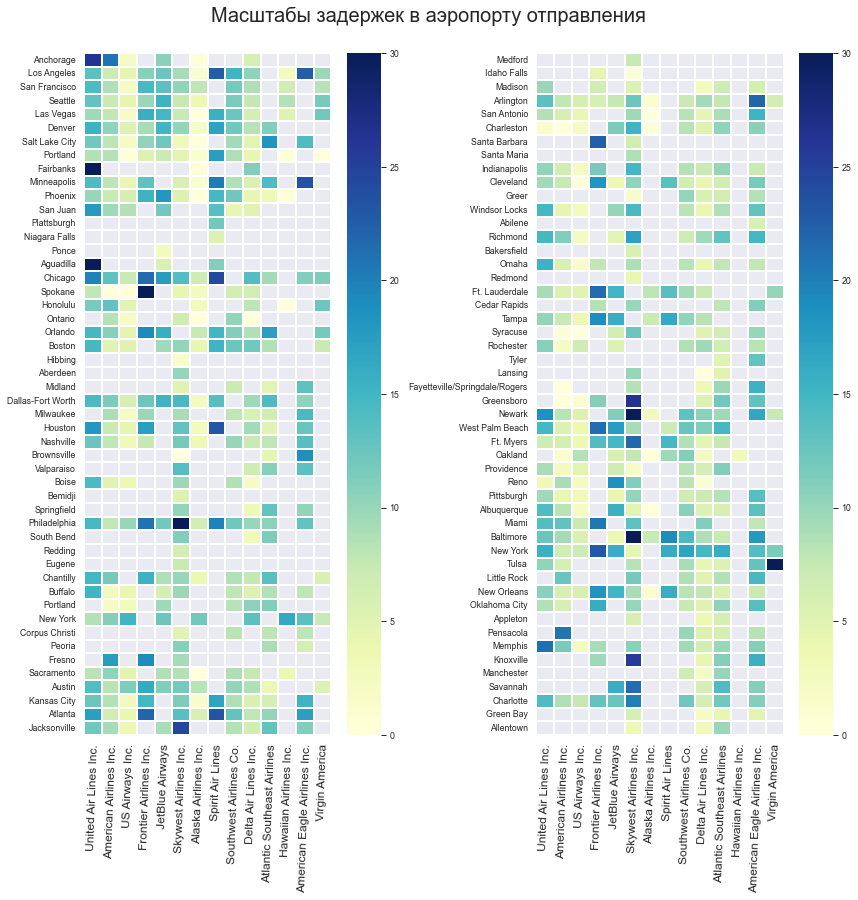

In [129]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Масштабы задержек в аэропорту отправления", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

In [ ]:
## удалим данные с значением NULL

In [12]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [13]:
airports = airports.dropna(subset = ['LATITUDE','LONGITUDE'])

In [14]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [15]:
airports.head(20)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [16]:
# найдем  процентное соотношение нулевых значений
flights_null = flights.isnull().sum()*100/flights.shape[0]
flights_null

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [ ]:
# Удаление подмножества нулевых значений

In [16]:
flights1 = flights.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [17]:
flights1.shape

(5714008, 31)

In [18]:
flights1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [ ]:
# Создадим набор данных с различными типами задержек

In [19]:
Delays = flights1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
Delays = flights1.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [21]:
Delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              object 
 1   ORIGIN_AIRPORT       object 
 2   DESTINATION_AIRPORT  object 
 3   DEPARTURE_DELAY      float64
 4   TAXI_OUT             float64
 5   ELAPSED_TIME         float64
 6   DISTANCE             int64  
 7   TAXI_IN              float64
 8   ARRIVAL_DELAY        float64
 9   AIR_SYSTEM_DELAY     float64
 10  SECURITY_DELAY       float64
 11  AIRLINE_DELAY        float64
 12  LATE_AIRCRAFT_DELAY  float64
 13  WEATHER_DELAY        float64
dtypes: float64(10), int64(1), object(3)
memory usage: 653.9+ MB


In [ ]:
# Создадим набор данных не учитывая виды задержек и удаляя нулевые значения

In [20]:
Fly = flights1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [21]:
Fly.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [22]:
Fly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [23]:
Fly.DEPARTURE_TIME.isnull().sum()

0

In [24]:
Fly.DEPARTURE_TIME.dtype

dtype('float64')

In [25]:
Fly.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5714008, dtype: float64

In [ ]:
# Данный формат времени не удобен для анализа, поэтому переведем в формат даты времени

In [26]:
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [27]:
Fly['DEPARTURE_TIME'] =flights1['DEPARTURE_TIME'].apply(Format_Hourmin)
Fly['DEPARTURE_TIME']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: DEPARTURE_TIME, Length: 5714008, dtype: object

In [ ]:
# Перевод в формат даты

In [28]:
Fly['Date'] = pd.to_datetime(Fly[['YEAR','MONTH','DAY']])
Fly.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: Date, Length: 5714008, dtype: datetime64[ns]

In [29]:
Fly['DEPARTURE_TIME'] =flights1['DEPARTURE_TIME'].apply(Format_Hourmin)
Fly['SCHEDULED_ARRIVAL'] =flights1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
Fly['ARRIVAL_TIME'] =flights1['ARRIVAL_TIME'].apply(Format_Hourmin)
Fly['SCHEDULED_DEPARTURE'] =flights1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)

In [30]:
Fly.SCHEDULED_DEPARTURE

0          00:05:00
1          00:10:00
2          00:20:00
3          00:20:00
4          00:25:00
             ...   
5819074    23:59:00
5819075    23:59:00
5819076    23:59:00
5819077    23:59:00
5819078    23:59:00
Name: SCHEDULED_DEPARTURE, Length: 5714008, dtype: object

In [ ]:
# Объединим три базы данных для лучшего анализа

In [31]:
# Объединим с данными Airlines
Fly = Fly.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [32]:
Fly = Fly.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [33]:
Fly = Fly.rename(columns={"AIRLINE_y":"AIRLINE"})

In [ ]:
# Объединяем данные с таблицей Airports

In [34]:
Fly = Fly.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
Fly = Fly.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [35]:
Fly.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Date', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [36]:
Fly = Fly.drop(['LATITUDE_x', 'LONGITUDE_x', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [37]:
Fly = Fly.rename(columns={'IATA_CODE_x':'Airport_Code','AIRPORT_x':'Airport_Name','CITY_x':'Airport_City',
                             'IATA_CODE_y':'Destination_Airport_Code','AIRPORT_y':'Destination_Airport_Name','CITY_y':'Destination_City'})

In [38]:
Fly

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,Date,AIRLINE,Airport_Code,Airport_Name,Airport_City,Destination_Airport_Code,Destination_Airport_Name,Destination_City
0,2015,1,1,4,98,N407AS,ANC,SEA,00:05:00,23:54:00,...,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,00:45:00,00:41:00,...,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,01:55:00,01:40:00,...,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,02:20:00,02:09:00,...,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,05:05:00,04:57:00,...,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015,12,29,2,2734,N884AS,MEI,PIB,20:46:00,20:37:00,...,0,0,2015-12-29,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221996,2015,12,30,3,2730,N880AS,MEI,PIB,14:35:00,16:16:00,...,0,0,2015-12-30,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221997,2015,12,30,3,2734,N907EV,MEI,PIB,20:46:00,20:56:00,...,0,0,2015-12-30,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221998,2015,12,31,4,2730,N907EV,MEI,PIB,14:35:00,14:21:00,...,0,0,2015-12-31,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [39]:
New_Fly = pd.DataFrame(Fly[['Date', 'AIRLINE', 'ORIGIN_AIRPORT', 'Airport_Name','Airport_City', 'DESTINATION_AIRPORT',
                               'Destination_Airport_Name','Destination_City','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
                               'DEPARTURE_DELAY','ARRIVAL_TIME','SCHEDULED_ARRIVAL','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','DISTANCE','AIR_TIME','TAXI_IN','TAXI_OUT']])

In [40]:
New_Fly

,Date,AIRLINE,ORIGIN_AIRPORT,Airport_Name,Airport_City,DESTINATION_AIRPORT,Destination_Airport_Name,Destination_City,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT
0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,00:05:00,23:54:00,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,1448,169.0,4.0,21.0
1,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,00:45:00,00:41:00,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,1448,173.0,4.0,17.0
2,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,01:55:00,01:40:00,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,1448,170.0,11.0,17.0
3,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,02:20:00,02:09:00,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,1448,176.0,8.0,15.0
4,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,05:05:00,04:57:00,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,1448,179.0,4.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015-12-29,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:37:00,-9.0,21:02:00,21:20:00,-18.0,34.0,25.0,69,17.0,2.0,6.0
5221996,2015-12-30,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,16:16:00,101.0,16:39:00,15:09:00,90.0,34.0,23.0,69,14.0,5.0,4.0
5221997,2015-12-30,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:56:00,10.0,21:30:00,21:20:00,10.0,34.0,34.0,69,18.0,4.0,12.0
5221998,2015-12-31,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,14:21:00,-14.0,14:51:00,15:09:00,-18.0,34.0,30.0,69,18.0,3.0,9.0


In [41]:
Fly_neg = New_Fly[New_Fly['DEPARTURE_DELAY'] > 0]

In [42]:
Fly_neg

,Date,AIRLINE,ORIGIN_AIRPORT,Airport_Name,Airport_City,DESTINATION_AIRPORT,Destination_Airport_Name,Destination_City,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT
22,2015-01-02,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,13:40:00,13:47:00,7.0,17:50:00,17:55:00,-5.0,195.0,183.0,1448,163.0,11.0,9.0
23,2015-01-02,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,14:30:00,14:39:00,9.0,18:39:00,18:50:00,-11.0,200.0,180.0,1448,162.0,8.0,10.0
28,2015-01-03,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,00:45:00,01:38:00,53.0,05:29:00,05:09:00,20.0,204.0,171.0,1448,156.0,4.0,11.0
29,2015-01-03,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,01:35:00,02:24:00,49.0,06:24:00,06:00:00,24.0,205.0,180.0,1448,163.0,9.0,8.0
30,2015-01-03,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,01:55:00,02:28:00,33.0,06:36:00,06:33:00,3.0,218.0,188.0,1448,163.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221990,2015-12-26,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,21:19:00,33.0,21:53:00,21:20:00,33.0,34.0,34.0,69,18.0,4.0,12.0
5221991,2015-12-27,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,22:19:00,93.0,22:49:00,21:20:00,89.0,34.0,30.0,69,19.0,4.0,7.0
5221992,2015-12-28,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,14:43:00,8.0,15:15:00,15:09:00,6.0,34.0,32.0,69,18.0,3.0,11.0
5221996,2015-12-30,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,16:16:00,101.0,16:39:00,15:09:00,90.0,34.0,23.0,69,14.0,5.0,4.0


In [43]:
Fly1 = Fly_neg[Fly_neg['DEPARTURE_DELAY'] == Fly_neg['DEPARTURE_DELAY'].min()]

In [44]:
Fly1.DEPARTURE_DELAY

202        1.0
282        1.0
288        1.0
333        1.0
441        1.0
          ... 
5221546    1.0
5221572    1.0
5221650    1.0
5221867    1.0
5221921    1.0
Name: DEPARTURE_DELAY, Length: 145486, dtype: float64

In [45]:
F=Fly1.Airport_Name.value_counts().sort_values(ascending=False)[:15]

In [46]:
print(F)

Hartsfield-Jackson Atlanta International Airport    11520
Chicago O'Hare International Airport                 7413
Denver International Airport                         6358
Dallas/Fort Worth International Airport              6308
Los Angeles International Airport                    6042
Phoenix Sky Harbor International Airport             4815
McCarran International Airport                       4199
San Francisco International Airport                  4188
George Bush Intercontinental Airport                 4045
Seattle-Tacoma International Airport                 3871
Orlando International Airport                        3225
Charlotte Douglas International Airport              3157
Chicago Midway International Airport                 3107
Newark Liberty International Airport                 3025
Baltimore-Washington International Airport           2929
Name: Airport_Name, dtype: int64


In [134]:
trace = go.Bar(x=F.index, y=F.values, marker=dict(color = F.values,colorscale='viridis',showscale=True))

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=30),title='Аэропорт с минимальной задержкой вылета', yaxis = dict(title = 'Количество рейсов с минимальной задержкой'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport

In [145]:
Fly_pos = New_Fly[New_Fly['ARRIVAL_DELAY'] < 0]

In [146]:
Fly_pos

,Date,AIRLINE,ORIGIN_AIRPORT,Airport_Name,Airport_City,DESTINATION_AIRPORT,Destination_Airport_Name,Destination_City,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,Taxi_Difference
0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,00:05:00,23:54:00,...,04:08:00,04:30:00,-22.0,205.0,194.0,1448,169.0,4.0,21.0,17.0
1,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,00:45:00,00:41:00,...,04:55:00,05:09:00,-14.0,204.0,194.0,1448,173.0,4.0,17.0,13.0
2,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,01:55:00,01:40:00,...,05:58:00,06:33:00,-35.0,218.0,198.0,1448,170.0,11.0,17.0,6.0
3,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,02:20:00,02:09:00,...,06:28:00,06:40:00,-12.0,200.0,199.0,1448,176.0,8.0,15.0,7.0
4,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,05:05:00,04:57:00,...,09:16:00,09:30:00,-14.0,205.0,199.0,1448,179.0,4.0,16.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221993,2015-12-28,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:41:00,...,21:05:00,21:20:00,-15.0,34.0,24.0,69,16.0,3.0,5.0,2.0
5221994,2015-12-29,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,14:10:00,...,14:41:00,15:09:00,-28.0,34.0,31.0,69,17.0,3.0,11.0,8.0
5221995,2015-12-29,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:37:00,...,21:02:00,21:20:00,-18.0,34.0,25.0,69,17.0,2.0,6.0,4.0
5221998,2015-12-31,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,14:21:00,...,14:51:00,15:09:00,-18.0,34.0,30.0,69,18.0,3.0,9.0,6.0


In [147]:
Fly2 = Fly_pos[Fly_pos['ARRIVAL_DELAY'] == Fly_pos['ARRIVAL_DELAY'].max()]

In [148]:
Fly2

,Date,AIRLINE,ORIGIN_AIRPORT,Airport_Name,Airport_City,DESTINATION_AIRPORT,Destination_Airport_Name,Destination_City,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,Taxi_Difference
94,2015-01-07,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,17:50:00,17:53:00,...,22:06:00,22:07:00,-1.0,197.0,193.0,1448,180.0,7.0,6.0,-1.0
120,2015-01-09,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,13:40:00,13:38:00,...,17:54:00,17:55:00,-1.0,195.0,196.0,1448,182.0,6.0,8.0,2.0
168,2015-01-13,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,05:05:00,05:01:00,...,09:29:00,09:30:00,-1.0,205.0,208.0,1448,181.0,13.0,14.0,1.0
183,2015-01-14,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,10:35:00,10:31:00,...,15:02:00,15:03:00,-1.0,208.0,211.0,1448,198.0,6.0,7.0,1.0
284,2015-01-22,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle,19:10:00,19:01:00,...,23:32:00,23:33:00,-1.0,203.0,211.0,1448,180.0,4.0,27.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221624,2015-04-23,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:38:00,...,21:15:00,21:16:00,-1.0,30.0,37.0,69,19.0,5.0,13.0,8.0
5221668,2015-05-19,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:34:00,...,21:15:00,21:16:00,-1.0,30.0,41.0,69,19.0,7.0,15.0,8.0
5221693,2015-06-03,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,20:46:00,20:44:00,...,21:15:00,21:16:00,-1.0,30.0,31.0,69,16.0,3.0,12.0,9.0
5221700,2015-06-08,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,14:35:00,14:34:00,...,15:04:00,15:05:00,-1.0,30.0,30.0,69,17.0,3.0,10.0,7.0


In [53]:
Airp = Fly2.loc[Fly2['Destination_Airport_Name'] == 'Los Angeles International Airport']

In [54]:
Airp

,Date,AIRLINE,ORIGIN_AIRPORT,Airport_Name,Airport_City,DESTINATION_AIRPORT,Destination_Airport_Name,Destination_City,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT
783078,2015-01-23,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,LAX,Los Angeles International Airport,Los Angeles,23:40:00,23:49:00,9.0,05:59:00,06:00:00,-1.0,320.0,310.0,2345,274.0,12.0,24.0
783195,2015-06-07,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,LAX,Los Angeles International Airport,Los Angeles,14:30:00,14:35:00,5.0,20:54:00,20:55:00,-1.0,325.0,319.0,2345,297.0,8.0,14.0
783221,2015-06-20,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,LAX,Los Angeles International Airport,Los Angeles,14:30:00,14:34:00,4.0,20:54:00,20:55:00,-1.0,325.0,320.0,2345,300.0,10.0,10.0
783303,2015-07-31,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,LAX,Los Angeles International Airport,Los Angeles,14:30:00,14:25:00,-5.0,20:52:00,20:53:00,-1.0,323.0,327.0,2345,301.0,8.0,18.0
783311,2015-08-04,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,LAX,Los Angeles International Airport,Los Angeles,14:30:00,14:37:00,7.0,20:52:00,20:53:00,-1.0,323.0,315.0,2345,279.0,9.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975117,2015-03-25,Skywest Airlines Inc.,SMX,Santa Maria Public Airport (Capt G. Allan Hanc...,Santa Maria,LAX,Los Angeles International Airport,Los Angeles,13:57:00,13:56:00,-1.0,14:55:00,14:56:00,-1.0,59.0,59.0,134,40.0,10.0,9.0
975126,2015-03-30,Skywest Airlines Inc.,SMX,Santa Maria Public Airport (Capt G. Allan Hanc...,Santa Maria,LAX,Los Angeles International Airport,Los Angeles,08:38:00,08:32:00,-6.0,09:42:00,09:43:00,-1.0,65.0,70.0,134,39.0,21.0,10.0
975139,2015-04-05,Skywest Airlines Inc.,SMX,Santa Maria Public Airport (Capt G. Allan Hanc...,Santa Maria,LAX,Los Angeles International Airport,Los Angeles,13:57:00,13:48:00,-9.0,14:55:00,14:56:00,-1.0,59.0,67.0,134,36.0,12.0,19.0
975164,2015-04-18,Skywest Airlines Inc.,SMX,Santa Maria Public Airport (Capt G. Allan Hanc...,Santa Maria,LAX,Los Angeles International Airport,Los Angeles,06:00:00,06:00:00,0.0,07:04:00,07:05:00,-1.0,65.0,64.0,134,36.0,12.0,16.0


In [55]:
F2=Airp.AIRLINE.value_counts().sort_values(ascending=False)

In [56]:
F2

Southwest Airlines Co.          910
Skywest Airlines Inc.           899
United Air Lines Inc.           548
American Airlines Inc.          529
Delta Air Lines Inc.            511
Virgin America                  311
Alaska Airlines Inc.            184
JetBlue Airways                  82
US Airways Inc.                  71
Spirit Air Lines                 70
Hawaiian Airlines Inc.           35
Frontier Airlines Inc.           28
American Eagle Airlines Inc.      1
Name: AIRLINE, dtype: int64

In [59]:
def airline_marketshare(data=Airp, by='AIRLINE', titlehere='Пунктуальные авиакомпании'):
    df = data.loc[:, [by]]
    df['Share %'] = 1
    top = df.groupby(by).sum().sort_values(by='Share %',ascending=False)
    top = top.reset_index()
    
    sharePlot = top['Share %'].plot.pie(subplots=True,
                                         autopct='%0.2f%%',
                                         fontsize=12,
                                         figsize=(10,10),
                                         legend=False,
                                         labels=top[by],
                                         shadow=False,
                                         explode=(0.01,0.02,0.03,0.04,0.05,0.06,
                                                  0.07,0.08,0.1,0.15,
                                                  0.2,0.25,
                                                  0.3,0.35)[:len(data[by].unique())],
                                         startangle=90,
                                         colormap='summer',
                                         title=titlehere
                                       )
    
    plt.show()

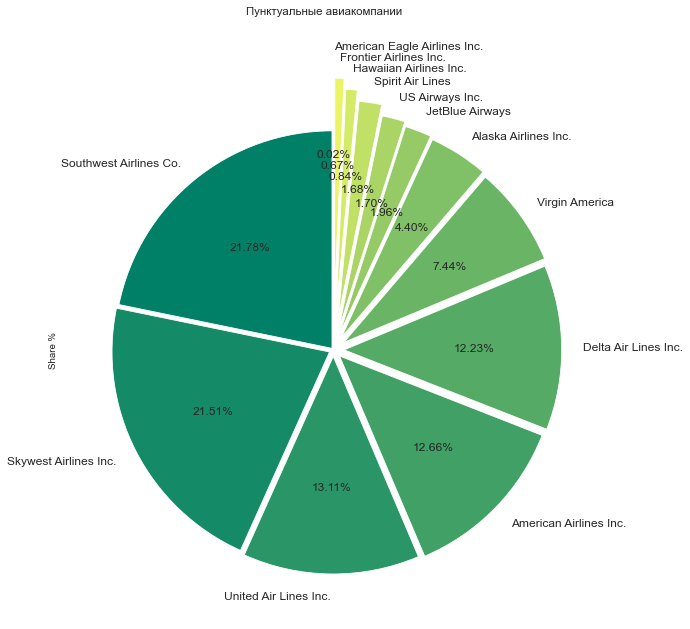

In [60]:
airline_marketshare()

In [ ]:
# Аэропорт с самой большой долей руления на 1 самолетовылет

In [159]:
New_Fly['Taxi_Difference'] = New_Fly['TAXI_OUT'] - New_Fly['TAXI_IN']
F3 = New_Fly.groupby('Airport_Name').Taxi_Difference.mean().to_frame().sort_values(by='Taxi_Difference',ascending=False).round(2)

trace = go.Bar(x=F3.index, y=F3.Taxi_Difference, marker=dict(color = F3.Taxi_Difference,colorscale='viridis',showscale=True))

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=30),title='Airport_Name_Difference', yaxis = dict(title = 'Minute'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [61]:
# Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика), в зависимости от аэропорта вылета

In [62]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
flight_new1 = pd.DataFrame(Fly[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK','ARRIVAL_DELAY','Airport_Name', 'Destination_Airport_Name']])

In [65]:
def make_date(df):
  return datetime.date(df.YEAR, df.MONTH, df.DAY)

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.dDate.dt.year
    data['month'] = data.dDate.dt.month
    data['day'] = data.dDate.dt.day
    data['dayofweek'] = data.dDate.dt.dayofweek
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['ARRIVAL_DELAY'].shift(lag)



In [66]:
flight_new1['dDate'] = flight_new1.apply(make_date,axis = 1)

In [67]:
flight_new1 [['Airport_Name','Destination_Airport_Name']] = flight_new1 [['Airport_Name','Destination_Airport_Name']].astype(str)

In [230]:
flight_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   ARRIVAL_DELAY             float64
 5   Airport_Name              object 
 6   Destination_Airport_Name  object 
 7   dDate                     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 358.6+ MB


In [69]:
flight_new_group1 = flight_new1.groupby(['dDate','Destination_Airport_Name'])['ARRIVAL_DELAY'].sum().reset_index()
flight_new_group1['dDate'] = pd.to_datetime(flight_new_group1['dDate'])

In [163]:
where_to_go = []
for dest in flight_new_group1.Destination_Airport_Name.unique():
    tempo = flight_new_group1[flight_new_group1.Destination_Airport_Name==dest][['dDate','ARRIVAL_DELAY']]
    tempo.columns = ['dDate','ARRIVAL_DELAY']
    tempo = pd.DataFrame(tempo)
    
    try:
    
        make_features(tempo,5,3)
        tempo.dropna(inplace=True)
        tempo.set_index('dDate',inplace=True)
           
        X_train,X_test,y_train, y_test = train_test_split(tempo.drop('ARRIVAL_DELAY', axis=1),tempo.ARRIVAL_DELAY, shuffle=False, test_size=0.25)
        
        model_lr = GradientBoostingRegressor()
        model_lr.fit(X_train,y_train)

        y_predicted_lr = model_lr.predict(X_test)
        where_to_go.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_lr))])

    except Exception as e:
        print('Error', str(e))
        


In [164]:
where_to_go = pd.DataFrame(where_to_go)
where_to_go.columns = ['Destination_Airport_Name','MEAN_ARRIVAL_DELAY_IN_PAST','RMSE']

In [165]:
start_airport = np.random.choice(flight_new1['Airport_Name'].unique()) 
where_to_go_from_start_airport = flight_new1[flight_new1.Airport_Name==start_airport]['Destination_Airport_Name'].unique()

where_to_go_from_start_airport = pd.DataFrame(where_to_go_from_start_airport)
where_to_go_from_start_airport.columns = ['Destination_Airport_Name']

top3 = where_to_go_from_start_airport\
    .merge(where_to_go,on='Destination_Airport_Name',how='inner')\
    .sort_values(by=['RMSE','MEAN_ARRIVAL_DELAY_IN_PAST'],ascending=[True, True])\
    .head(3)

print('Лучшие направления с аэропорта',start_airport)
print('')
print(top3)

Лучшие направления с аэропорта Yakutat Airport

           Destination_Airport_Name  MEAN_ARRIVAL_DELAY_IN_PAST        RMSE
1  Merle K. (Mudhole) Smith Airport                   -1.048780   54.071738
0      Juneau International Airport                   15.433735  193.103171


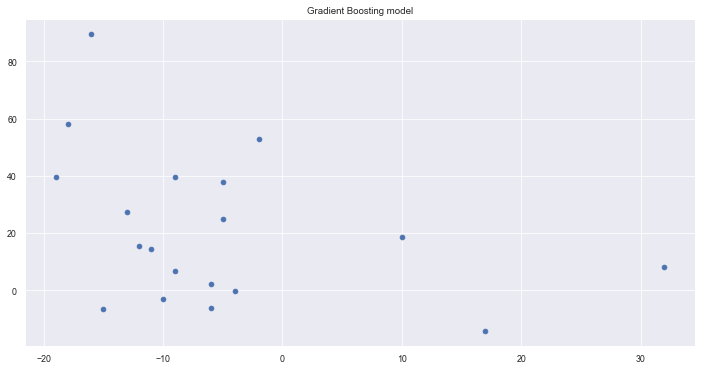

In [229]:
plt.figure(figsize = (12,6))
plt.title('Gradient Boosting model')
plt.scatter(y_test,y_predicted_lr)

plt.show()